In [1]:
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import os
import scipy.misc as s
import pandas as pd
import random
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## PCA plots

In [40]:
X=np.random.randn(100, 3)*5

In [41]:
X[:, 1] = X[:, 0] * 2 + np.random.randn(100) + X[:, 1]
X[:, 2] = X[:, 1] * 0.8 + np.random.randn(100) 

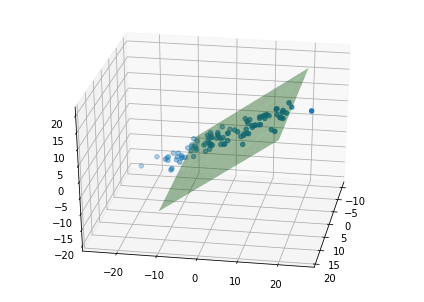

In [55]:
from sklearn import datasets

np.random.seed(5)


pca = PCA(n_components=2)
pca.fit(X)
C = pca.components_

fig = plt.figure()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.view_init(30, 10)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

p0 = C[0] * 0.2 + C[1] * 0.15
p1 = C[0] * 0.1 + C[1] * 0.4
p2 = C[0] * 0.3 + C[1] * 0.02

x0, y0, z0 = p0
x1, y1, z1 = p1
x2, y2, z2 = p2

ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array(p0)
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(-10,20), range(-10,20))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

ax.plot_surface(xx, yy, z, alpha=0.4, color='green')


plt.show()

# data sunsanqq

The labels of each face image is embedded in the file name, formated like [age] _ [gender] _ [race] _ [date&time].jpg

[age] is an integer from 0 to 116, indicating the age

[gender] is either 0 (male) or 1 (female)

[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

https://susanqq.github.io/UTKFace/

In [2]:
files = os.listdir("data/crop_part1/")

In [3]:
image_file = Image.open("data/crop_part1/100_1_0_20170110183726390.jpg.chip.jpg") # open colour image

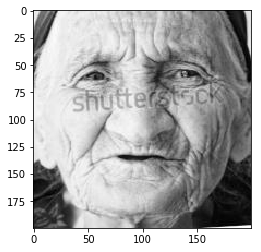

In [4]:
plt.imshow(np.dot(np.array(image_file)[:,:,:3], [0.2989, 0.5870, 0.1140]), cmap='gray')

In [7]:
shape=(32,32)

In [5]:
random.seed(2)

In [25]:
random.shuffle(files) #randomizing the files to sample from it (this is just to save time)

In [26]:
male_faces = pd.DataFrame([])
female_faces = pd.DataFrame([])
m = 0
fe = 0
for f in files:
    if f.split('_')[1] == "0" and m<600: #male
        m += 1
        image_file = Image.open("data/crop_part1/" + f)
        image_file = image_file.resize((32,32), Image.ANTIALIAS)
        img = np.dot(np.array(image_file)[:,:,:3], [0.2989, 0.5870, 0.1140])#/255 #convert to gray scale
        face = pd.Series(img.flatten(), name=f)
        male_faces = male_faces.append(face)
    if f.split('_')[1] == "1" and fe<600: #female
        fe += 1
        image_file = Image.open("data/crop_part1/" + f)
        image_file = image_file.resize((32,32), Image.ANTIALIAS)
        img = np.dot(np.array(image_file)[:,:,:3], [0.2989, 0.5870, 0.1140])#/255 #convert to gray scale
        face = pd.Series(img.flatten(), name=f)
        female_faces = female_faces.append(face)

In [27]:
male_faces.shape, female_faces.shape

((600, 1024), (600, 1024))

In [28]:
all_faces = pd.concat([male_faces, female_faces], axis=0)
all_faces.shape

(1200, 1024)

# Same data as in the paper

Gary B. Huang, Manu Ramesh, Tamara Berg, and Erik Learned-Miller. Labeled faces in the wild: A database for studying face recognition in unconstrained environments. Technical Report 07-49, University of Massachusetts, Amherst, October 2007.

In [5]:
sex = pd.read_csv("data/images/sex.txt", header=None).to_dict()[0] #map from index to sex
imgs = os.listdir("data/images/")
imgs = [f for f in imgs if 'img' in f]

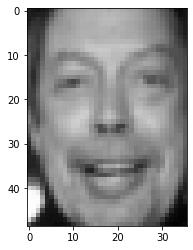

In [6]:
plt.imshow(np.loadtxt("data/images/" + "img0.txt"), cmap='gray')

In [7]:
np.loadtxt("data/images/" + "img1.txt").shape

(49, 36)

In [8]:
shape = (49,36)

In [9]:
random.shuffle(imgs)
male_faces = pd.DataFrame([])
female_faces = pd.DataFrame([])
t = 0
for f in imgs:
    if t%500 == 0:
        print("Done : ", t)
    t+=1
    if sex[int(f[3:-4])] == 1:#male
        im = np.loadtxt("data/images/" + f)
        male_faces=male_faces.append(pd.Series(im.flatten(), name=f[3:-4]))
    if sex[int(f[3:-4])] == 0:#female
        im = np.loadtxt("data/images/" + f)
        female_faces=female_faces.append(pd.Series(im.flatten(), name=f[3:-4]))

Done :  0
Done :  500
Done :  1000
Done :  1500
Done :  2000
Done :  2500
Done :  3000
Done :  3500
Done :  4000
Done :  4500
Done :  5000
Done :  5500
Done :  6000
Done :  6500
Done :  7000
Done :  7500
Done :  8000
Done :  8500
Done :  9000
Done :  9500
Done :  10000
Done :  10500
Done :  11000
Done :  11500
Done :  12000
Done :  12500
Done :  13000


In [10]:
all_faces = pd.concat([male_faces, female_faces], axis=0)
all_faces = all_faces/255
all_faces = all_faces #- np.mean(all_faces)
all_faces.shape

(13232, 1764)

In [11]:
A = male_faces.copy()
A = A/255
A = A - np.mean(A, axis=0)
A.shape

(10270, 1764)

In [12]:
B = female_faces.copy()
B = B/255
B = B - np.mean(B, axis=0)
B.shape

(2962, 1764)

In [13]:
M = all_faces - np.mean(all_faces, axis=0)

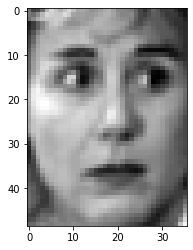

In [14]:
plt.imshow(np.array(female_faces)[0].reshape(shape), cmap='gray')

# Credit Data

In [2]:
credit = pd.read_csv('data/default_degree.csv', header=1)

In [3]:
credit.head()

,ID,EDUCATION,SEX,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,2,2,20000,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,2,2,120000,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,2,2,90000,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,2,2,50000,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,2,1,50000,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [4]:
credit.shape

(30000, 24)

In [5]:
credit.drop('ID', axis=1, inplace=True)

In [6]:
credit.columns

Index(['EDUCATION', 'SEX', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [7]:
credit.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [8]:
credit.EDUCATION.replace([0, 4, 5, 6], 4, inplace=True)
credit.EDUCATION.unique()

array([2, 1, 3, 4], dtype=int64)

In [9]:
credit["EDU_NORM"] = (credit['EDUCATION']-1)*(credit['EDUCATION']-2)

In [10]:
credit.EDU_NORM.unique()

array([0, 2, 6], dtype=int64)

In [11]:
credit.EDU_NORM.replace([2, 6], 1, inplace=True)

In [12]:
credit.columns

Index(['EDUCATION', 'SEX', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_NORM'],
      dtype='object')

In [13]:
data = credit.drop(['EDUCATION', 'EDU_NORM'], axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_transformed = pd.DataFrame(scaler.transform(data))
data_transformed.columns = data.columns

In [15]:
data_transformed['EDU_NORM'] = credit["EDU_NORM"]
data_transformed.head()

,SEX,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDU_NORM
0,0.810161,-1.136720,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,0
1,0.810161,-0.365981,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,0
2,0.810161,-0.597202,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,0.810161,-0.905498,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-1.234323,-0.905498,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [16]:
#Low Educated PEOPLE:
data_low = data_transformed[data_transformed['EDU_NORM']==1]
#High Educated PEOPLE:
data_high = data_transformed[data_transformed['EDU_NORM']==0]

mean_low_edu = data_low.mean()[:-1]
mean_high_edu = data_high.mean()[:-1]


In [17]:
data_low_centred = data_low.iloc[:,:-1]-mean_low_edu
data_high_centred = data_high.iloc[:,:-1]-mean_high_edu

In [18]:
A, B = data_low_centred, data_high_centred

In [19]:
A.shape, B.shape

((5385, 22), (24615, 22))

In [20]:
M = pd.concat([data_low_centred, data_high_centred], axis=0)
M.head()

,SEX,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8,0.820071,0.066978,-0.822909,-1.295188,-0.089398,0.001396,1.704881,0.089744,0.152570,0.192488,...,-0.476284,-0.432650,-0.411845,-0.528742,-0.100073,-0.230889,-0.222213,-0.196410,-0.182086,-0.176799
9,-1.224412,-0.857909,1.092943,-0.535784,-1.869102,-1.669216,-1.637232,-1.620946,-0.729911,-0.677101,...,-0.650882,-0.622463,-0.391876,-0.357584,-0.301063,-0.230889,-0.246749,0.570032,-0.174101,-0.233051
10,0.820071,0.529422,1.092943,-0.644270,-0.089398,0.001396,1.704881,0.089744,0.152570,-0.677101,...,-0.571067,-0.583400,-0.575753,-0.528541,-0.161837,-0.230369,-0.243909,-0.241093,-0.002875,-0.229339
15,0.820071,-0.626687,3.008795,-1.837620,0.800453,1.672008,0.033825,0.089744,0.152570,0.192488,...,-0.245449,-0.175235,-0.120083,-0.083896,-0.301063,-0.165787,-0.184273,-0.183643,-0.162450,-0.171174
20,0.820071,-0.010096,1.092943,-0.101838,-0.089398,0.001396,0.033825,0.089744,0.152570,-0.677101,...,-0.297751,-0.301999,-0.411697,-0.575574,-0.119936,-0.164181,-0.189952,-0.132577,-0.186668,1.666239


In [21]:
%%time
pca = PCA(n_components=20)
pca.fit(M)

Wall time: 1.69 s


PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
projected = pca.inverse_transform(pca.transform(M))

In [24]:
def re(a, b):
    return np.linalg.norm(a-b, ord='fro')**2 / a.shape[0]

In [25]:
re(M, projected)

0.04851532742045696

In [44]:
#BIAIS BTW HIGH/LOW EDUCATED
re_low = []
re_high = []
fairloss_low = []
fairloss_high = []


dim = [d for d in range(2,21)]
for d in dim:
    #projected = pca(M, d)
    pca = PCA(n_components=d)
    pca.fit(M)
    #computing RE for men with dimensionnality reduction d
    re_low.append(re(A, pca.inverse_transform(pca.transform(A))))
    fairloss_low.append(fair_loss(A, pca.inverse_transform(pca.transform(A)), d))

    #computing RE for women with dimensionnality reduction d
    re_high.append(re(B, pca.inverse_transform(pca.transform(B))))
    fairloss_high.append(fair_loss(B, pca.inverse_transform(pca.transform(B)), d))

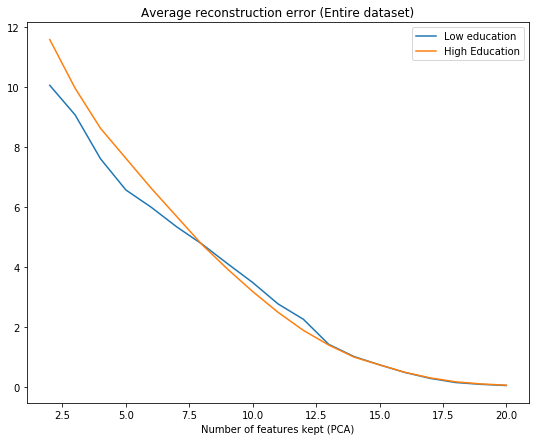

In [28]:
plt.figure(figsize=(9, 7))
plt.plot(dim, re_low, label="Low education")
plt.plot(dim, re_high, label="High Education")
plt.legend()
plt.title("Average reconstruction error (Entire dataset)")
plt.xlabel("Number of features kept (PCA)")
plt.show()

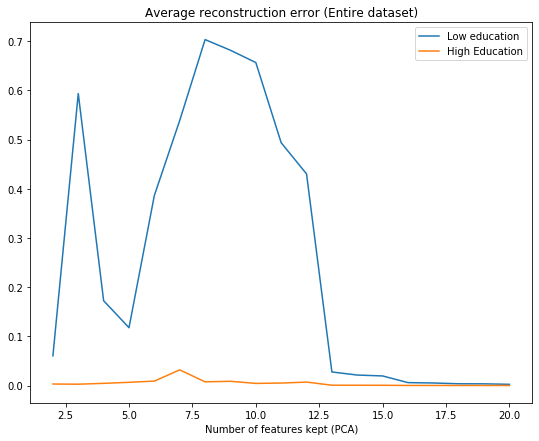

In [45]:
plt.figure(figsize=(9, 7))
plt.plot(dim, fairloss_low, label="Low education")
plt.plot(dim, fairloss_high, label="High Education")
plt.legend()
plt.title("Average reconstruction error (Entire dataset)")
plt.xlabel("Number of features kept (PCA)")
plt.show()

In [35]:
A_test = A.sample(500)
B_test = B.sample(500)
M_test = pd.concat([A_test, B_test], axis=0)

In [38]:
def fair_loss(X, proj, d):
    pca = PCA(n_components=d)
    pca.fit(X)
    #computing RE for men with dimensionnality reduction d
    opt_proj = pca.inverse_transform(pca.transform(X)) 
    return re(X, proj) - re(X, opt_proj)

In [40]:
%%time
re_low = []
re_high = []

fairloss_low = []
fairloss_high = []

dim = [d for d in range(2,21)]
for d in dim:
    U = fair_PCA(A_test, B_test, d)
    #computing RE and fair loss for low educated with dimensionnality reduction d
    re_low.append(re(A_test, U[:500]))
    fairloss_low.append(fair_loss(A_test, U[:500], d))
    #computing RE and fair loss for high educated with dimensionnality reduction d
    re_high.append(re(B_test, U[500:]))
    fairloss_high.append(fair_loss(B_test, U[500:], d))


Step 1 done
-----------
Step 2 done
-----------
Step 3 done
-----------
Starting LP solve...
     pcost       dcost       gap    pres   dres   k/t
 0:  2.0316e+02  3.2455e+04  7e+03  3e-02  2e+04  1e+00
 1:  2.6564e+01  2.5256e+03  3e+02  3e-03  2e+03  8e+00
 2:  4.2737e+00  3.6966e+02  4e+01  4e-04  3e+02  1e+00
 3:  2.9160e+00  6.6657e+01  6e+00  7e-05  5e+01  2e-01
 4:  2.8340e+00  6.4852e+00  4e-01  4e-06  3e+00  1e-02
 5:  2.8364e+00  2.8738e+00  4e-03  4e-08  3e-02  1e-04
 6:  2.8364e+00  2.8368e+00  4e-05  4e-10  3e-04  1e-06
 7:  2.8364e+00  2.8364e+00  4e-07  4e-12  3e-06  1e-08
 8:  2.8364e+00  2.8364e+00  4e-09  4e-14  3e-08  1e-10
Optimal solution found.
Step 4 done
-----------
Step 5 done
-----------
Step 1 done
-----------
Step 2 done
-----------
Step 3 done
-----------
Starting LP solve...
     pcost       dcost       gap    pres   dres   k/t
 0:  2.1484e+02  3.9785e+04  7e+03  3e-02  3e+04  1e+00
 1:  5.1007e+01  4.0626e+03  3e+02  3e-03  3e+03  9e+00
 2:  1.8435e+01  4

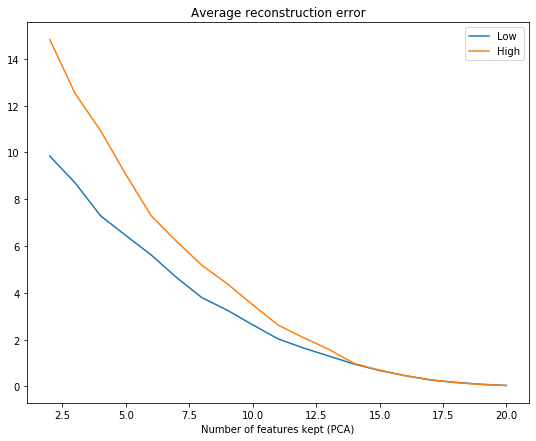

In [41]:
plt.figure(figsize=(9, 7))
plt.plot(dim, re_low, label="Low")
plt.plot(dim, re_high, label="High")
plt.legend()
plt.title("Average reconstruction error")
plt.xlabel("Number of features kept (PCA)")
plt.show()

In [62]:
average_fair_loss = np.add(fairloss_low, fairloss_high)/2

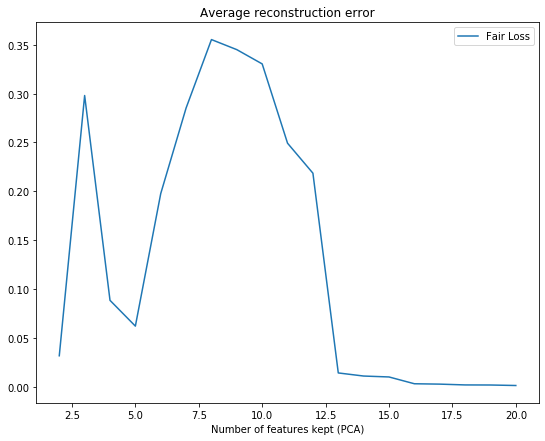

In [63]:
plt.figure(figsize=(9, 7))
plt.plot(dim, average_fair_loss, label="Fair Loss")
plt.legend()
plt.title("Average reconstruction error")
plt.xlabel("Number of features kept (PCA)")
plt.show()

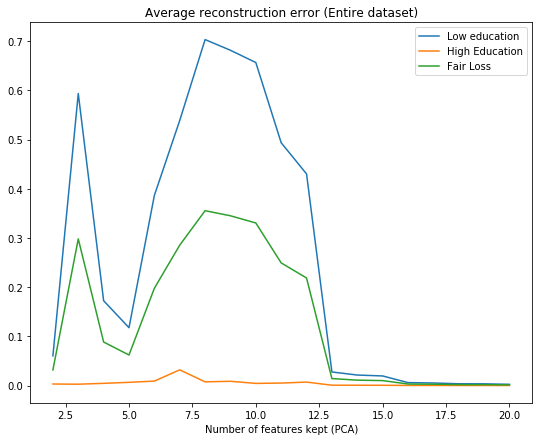

In [65]:
plt.figure(figsize=(9, 7))
plt.plot(dim, fairloss_low, label="Low education") #attention le fairloss high et low ici son ceux de l'acp classique, et l'average est fait sur les fairloss du fair pca
plt.plot(dim, fairloss_high, label="High Education")
plt.plot(dim, average_fair_loss, label="Fair Loss")

plt.legend()
plt.title("Average reconstruction error (Entire dataset)")
plt.xlabel("Number of features kept (PCA)")
plt.show()

# Standard PCA

In [15]:
%%time
pca = PCA(n_components=20)
pca.fit(M)

Wall time: 5.38 s


PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
projected = pca.inverse_transform(pca.transform(M))

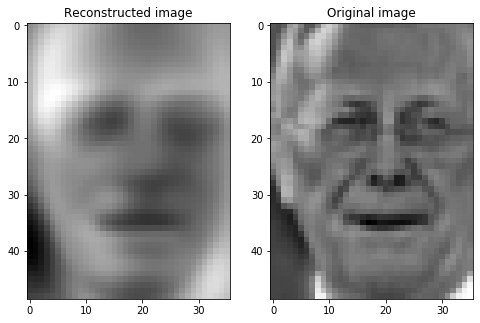

Reconstruction error is :  10.799749950050161


In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
axes[0].imshow(projected[0].reshape(shape), cmap='gray')
axes[0].set_title("Reconstructed image")
axes[1].imshow(np.array(M)[0].reshape(shape), cmap='gray')
axes[1].set_title("Original image")
plt.show()
print("Reconstruction error is : ", np.sum(np.square(np.array(M)[0]-np.array(projected)[0])))

In [117]:
def re(a, b):
    return np.linalg.norm(a-b, ord='fro')**2 / a.shape[0]

In [19]:
re(M, projected)

11.414602663131795

### Bias between males and females in PCA 

On the entire dataset : we run pca on the entire dataset once for each value of d we consider

In [19]:
%%time
re_male = []
re_female = []
dim = [d for d in range(2,21)]
for d in dim:
    #projected = pca(M, d)
    pca = PCA(n_components=d)
    pca.fit(M)
    #computing RE for men with dimensionnality reduction d
    re_male.append(re(A, pca.inverse_transform(pca.transform(A))))
    #computing RE for women with dimensionnality reduction d
    re_female.append(re(B, pca.inverse_transform(pca.transform(B))))

Wall time: 22.1 s


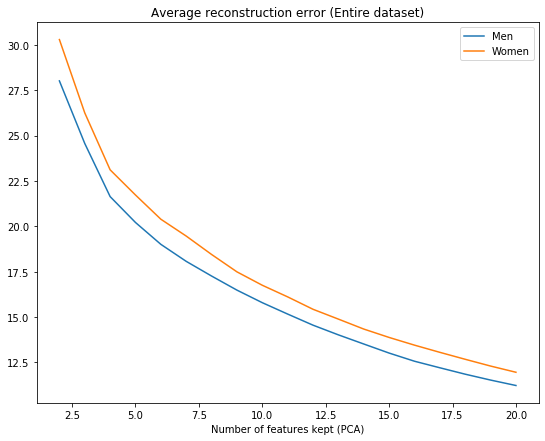

In [20]:
plt.figure(figsize=(9, 7))
plt.plot(dim, re_male, label="Men")
plt.plot(dim, re_female, label="Women")
plt.legend()
plt.title("Average reconstruction error (Entire dataset)")
plt.xlabel("Number of features kept (PCA)")
plt.show()

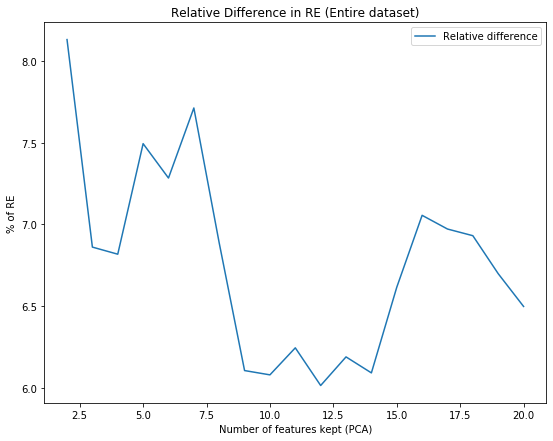

In [21]:
rel_diff = (np.array(re_female)-np.array(re_male))/np.array(re_male)
plt.figure(figsize=(9, 7))
plt.plot(dim, rel_diff*100, label="Relative difference")
plt.legend()
plt.title("Relative Difference in RE (Entire dataset)")
plt.xlabel("Number of features kept (PCA)")
plt.ylabel("% of RE")
plt.show()

Sample 200 men and 200 women 20 times and average RE over these 20 samples ( for each sample we run pca for each dimension d we try) : 

In [22]:
%%time
male_error = {}
female_error = {}
for bt in range(20):
    if bt%5==0:
        print("------------")
        print("Sample number "+str(bt)+" in process...")
    sample = pd.concat([male_faces.sample(500), female_faces.sample(500)], axis=0)
    sample = sample/255
    sample = sample - np.mean(sample, axis=0)
    re_male = []
    re_female = []
    dim = [d for d in range(2,21)]
    for d in dim:
        pca = PCA(n_components=d)
        pca.fit(sample)
        projected = pca.inverse_transform(pca.transform(sample))
        #computing RE for men with dimensionnality reduction d
        re_male.append(re(sample[:500], projected[:500]))
        #computing RE for women with dimensionnality reduction d
        re_female.append(re(sample[500:], projected[500:]))
    male_error[bt] = re_male
    female_error[bt] = re_female

------------
Sample number 0 in process...
------------
Sample number 5 in process...
------------
Sample number 10 in process...
------------
Sample number 15 in process...
Wall time: 48.4 s


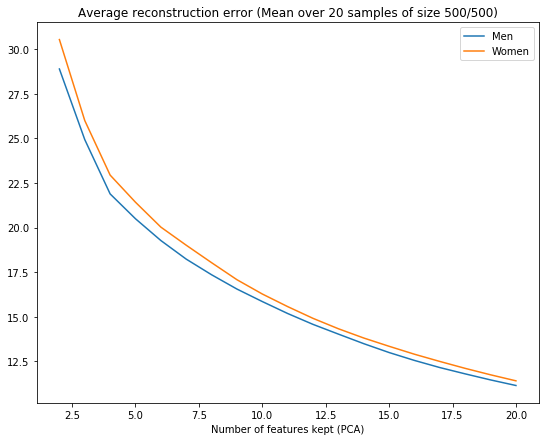

In [23]:
plt.figure(figsize=(9, 7))
plt.plot(dim, np.mean(np.array(list(male_error.values())), axis=0), label="Men")
plt.plot(dim, np.mean(np.array(list(female_error.values())), axis=0), label="Women")
plt.legend()
plt.title("Average reconstruction error (Mean over 20 samples of size 500/500)")
plt.xlabel("Number of features kept (PCA)")
plt.show()

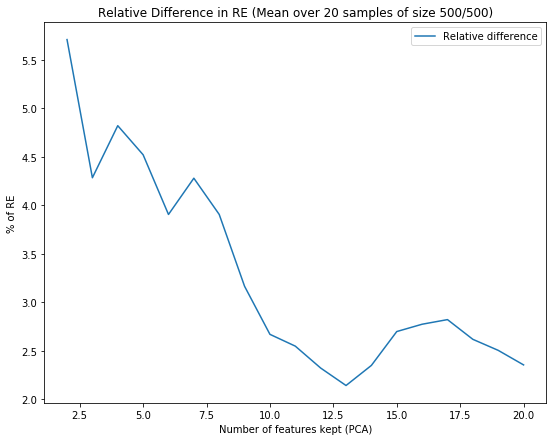

In [24]:
rel_diff = (np.mean(np.array(list(female_error.values())),axis=0)-np.mean(np.array(list(male_error.values())), axis=0))/np.mean(np.array(list(male_error.values())), axis=0)
plt.figure(figsize=(9, 7))
plt.plot(dim, rel_diff*100, label="Relative difference")
plt.legend()
plt.title("Relative Difference in RE (Mean over 20 samples of size 500/500)")
plt.xlabel("Number of features kept (PCA)")
plt.ylabel("% of RE")
plt.show()

# Fair PCA - Implementation

**First implement the Oracle function**

In [29]:
def frob_innerproduct(a, b):
    return np.trace(a.T @ b)

In [30]:
def oracle(p, alpha, beta, A, B, d):
    """ Oracle fo Fair PCA - Algorithm 2
        -----------
        Parameters :
        p : tuple of size 2 such that each component are positive and sum to 1.
        alpha : float
        beta : float
        A : array of shape (m1, n)
        B : array of shape (m2, n)
        -----------
        Returns : 
        P, z1, z2 such that : 
            
            P, z1, z2 = argmin p1*z1 + p2*z2
            s.t.
                z1 = alpha - 1/m1 <A'A, P>
                z2 = beta - 1/m1 <B'B, P>
                P is a matrix of size nxn such that 0 <= P <= P and Tr(P) <= d.
    """
    
    p1, p2, m1, m2 = p[0], p[1], A.shape[0], B.shape[0]
    mat = p1/m1 * A.T @ A + p2/m2 * B.T @ B
    pca = PCA(n_components=d)
    pca.fit(mat)
    V = pca.inverse_transform(pca.transform(mat))
    #V = pca(mat, d)
    P = V@V.T
    z1 = alpha - (1/m1) * frob_innerproduct(A.T @ A, P)
    z2 = beta - (1/m2) * frob_innerproduct(B.T @ B, P)
    return P, z1, z2

In [31]:
def MW_PCA(alpha, beta, A, B, eta, T, d):
    """ Multiplicative weight update for faire PCA - Algorithm 3
        -----------
        Parameters :
        alpha : float
        beta : float
        A : array of shape (m1, n)
        B : array of shape (m2, n)
        eta : float, must be stricly positive
        T : int, must be positive (According to the reference paper, no need for T to be very large : a fews tens)
        -----------
        Returns : 
        P, z such that : 
            
            P, z = argmin z
            s.t.
                z1 >= alpha - 1/m1 <A'A, P>
                z2 >= beta - 1/m2 <B'B, P>
                P is a matrix of size nxn such that 0 <= P <= P and Tr(P) <= d.
    """
    p = [0.5, 0.5] #initialize values for p for the oracle function
    Ps = []
    m1, m2 = A.shape[0], B.shape[0]
    #Looping T times
    for t in range(1, T+1):
        Pt, m1t, m2t = oracle(p, alpha, beta, A, B, d)
        Ps.append(Pt)
        p_hat1, p_hat2 = p[0] * np.exp(eta*m1), p[1] * np.exp(eta*m2)
        s = p_hat1 + p_hat2
        p = [p_hat1/s, p_hat2/s]
    #return values found
    P = np.mean(Ps, axis=0)
    z = max(alpha - (1/m1) * frob_innerproduct(A.T @ A, P), beta - (1/m2) * frob_innerproduct(B.T @ B, P))
    return P, z

**All steps of algorithm 1 (Fair PCA) are done except step 4 : solving the following linear program** 

We do it now : 

Program :


$\min_{\lambda \in \mathbb{R}^{n}, z \in \mathbb{R}} \; z $

s.t. 

$0 \leq \lambda_i \leq 1$ 


$\sum_{i} \lambda_i \leq d$

$-z - \sum_{i} \lambda_i \cdot <B^{T}B, u_j, u_j^{T}> \; \leq  - \frac{|| \hat{B} ||_F^2}{m2}$


$-z - \sum_{i} \lambda_i \cdot <A^{T}A, u_j, u_j^{T}> \; \leq  - \frac{|| \hat{A} ||_F^2}{m1}$


To solve this linear program we first write it in its canonical form : 



**mettre les formules** 



In [32]:
from cvxopt import matrix, solvers

In [33]:
def rank_approx(M, d):
    """ Low rank approximation of matrices using SVD decomposition
        -----------
        Parameters :
        M : array 
        d : lower dimension wanted
        -----------
        Returns : 
        L, optimal rank d approximation of M.
    """
    M_U, M_eig, M_V = np.linalg.svd(M)
    L = np.outer(M_U[:, 0], M_V[0, :]) * M_eig[0]
    for j in range(1,d):
        L += np.outer(M_U[:, j], M_V[j, :]) * M_eig[j]
    return L

In [34]:
def fair_PCA(A, B, d):
    """ Fair PCA - Algorithm 1
        -----------
        Parameters :
        A : array of shape (m1, n)
        B : array of shape (m2, n)
        d : lower dimension wanted
        -----------
        Returns : 
        U of shape (m, n) st m = m1 + m2 and rank(U) <= d+1
    """
    #step 1 
    m1, m2 = A.shape[1], B.shape[1]
    A_hat = rank_approx(A, d)
    B_hat = rank_approx(B, d)
    print("Step 1 done")
    print("-----------")
    #step 2 
    alpha, beta, eta, T = frob_innerproduct(A_hat, A_hat)/m1, frob_innerproduct(B_hat, B_hat)/m2, 1, 10
    P, z = MW_PCA(alpha, beta, A, B, eta, T, d)
    print("Step 2 done")
    print("-----------")
    #step 3 
    P_U, P_eig, P_V = np.linalg.svd(P)
    print("Step 3 done")
    print("-----------")
    #step 4 
    #Here we will solve a LP, we first constuct matrices in order to write the LP problem 
    #in a canonical form as explained earlier (so we can use a library to solve it).
    n = A.shape[1]
    #construct a matrix of constraint : 
    A_lp_const = np.pad(np.eye(n), ((1,2), (0,1)), mode='constant', constant_values=((1,0), (0,0)))
    A_lp_const[n+1, n] = -1
    A_lp_const[n+2, n] = -1
    ata = A.T @ A
    btb = B.T @ B
    for j in range(n):
        uut = np.outer(P_U[:, j], P_V[j, :])
        fAj = -frob_innerproduct(ata, uut)/m1
        fBj = -frob_innerproduct(btb, uut)/m2
        A_lp_const[n+1, j] = fAj
        A_lp_const[n+2, j] = fBj
    A_lp_const = np.concatenate((A_lp_const, np.pad(-np.eye(n), ((0,0), (0,1)), mode='constant', constant_values=((0,0), (0,0)))))
    #now construct vector of values (i.e. b ) and coefficients (i.e. c)
    b = np.ones(n+3)
    b[0] = d 
    b[-1] = -frob_innerproduct(B_hat, B_hat)/m2
    b[-2] = -frob_innerproduct(A_hat, A_hat)/m1
    b = np.concatenate((b, np.zeros(n)))
    c = np.zeros(n+1)
    c[-1] = 1
    print("Starting LP solve...")
    #A,b,c must in the "matrix" library format
    coefs = solvers.lp(matrix(list(c)), matrix(A_lp_const), matrix(list(b)),show_progress=False)
    z_opt = np.array(coefs['x'])[-1]
    lambda_bar = np.array(coefs['x'])[:-1]
    print("Step 4 done")
    print("-----------")
    #Step 5 : construct lambda* and P*
    lambda_bar = 1 - np.sqrt(np.maximum(1-lambda_bar,0))
    #warning
    #if (np.sum(lambda_bar) > d + 2) or (np.sum(lambda_bar) < d - 1):
    P_star = np.outer(P_U[:, 0], P_V[0, :]) * lambda_bar[0]
    for j in range(1, len(lambda_bar)):
        if lambda_bar[j] > 0.07:
            P_star += np.outer(P_U[:, j], P_V[j, :]) * lambda_bar[j]
    print("Step 5 done")
    print("-----------")
    #Finally construct U (pca matrix)
    U = np.concatenate((A, B)) @ P_star
    return U

In [54]:
A_test = A.sample(500)
B_test = B.sample(500)
M_test = pd.concat([A_test, B_test], axis=0)

In [57]:
%time U = fair_PCA(A_test, B_test, 20)

Step 1 done
-----------
Step 2 done
-----------
Step 3 done
-----------
Starting LP solve...
     pcost       dcost       gap    pres   dres   k/t
 0:  9.6421e+00 -4.6824e+03  2e+04  2e+00  1e+02  1e+00
 1:  3.5592e+00 -8.0985e+02  2e+03  4e-01  2e+01  3e+00
 2:  4.0624e+00 -9.8418e+01  2e+02  5e-02  2e+00  5e-01
 3:  3.6599e+00 -7.8674e+01  1e+02  4e-02  2e+00  4e-01
 4:  3.3470e+00 -1.7428e+01  3e+01  1e-02  5e-01  3e-03
 5:  2.9599e+00 -1.8020e+01  3e+01  1e-02  5e-01  3e-03
 6:  2.7298e+00 -1.7240e+01  3e+01  1e-02  5e-01  4e-03
 7:  2.9531e+00 -1.4310e+01  2e+01  9e-03  4e-01  5e-03
 8:  2.6509e+00 -1.4280e+01  2e+01  9e-03  4e-01  5e-03
 9:  2.3145e+00 -1.3470e+01  2e+01  8e-03  4e-01  5e-03
10:  1.9871e+00 -9.0548e+00  1e+01  6e-03  3e-01  4e-03
11:  1.9496e+00 -8.8361e+00  1e+01  6e-03  3e-01  4e-03
12:  1.8913e+00 -8.5034e+00  1e+01  5e-03  2e-01  3e-03
13:  1.5196e+00 -7.8707e+00  1e+01  5e-03  2e-01  3e-03
14:  1.6234e+00 -6.7189e+00  1e+01  4e-03  2e-01  3e-03
15:  1.7056e+

UnboundLocalError: local variable 'P_star' referenced before assignment

In [35]:
U.shape

(1000, 1764)

In [36]:
np.linalg.matrix_rank(U) #the matrix we got is indeed of rank d = 20 (or d+1)

20

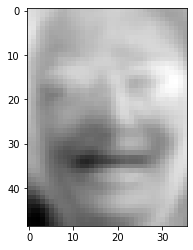

In [37]:
plt.imshow(U[0, :].reshape(shape), cmap='gray')

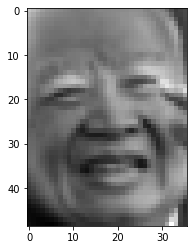

In [38]:
plt.imshow(np.array(A_test)[0, :].reshape(shape), cmap='gray')

In [39]:
print("After fair PCA, RE on Male :", re(A_test, U[:500]), "|| Female : ", re(B_test, U[500:]))

After fair PCA, RE on Male : 11.004076803382791 || Female :  11.333796857167615


In [42]:
%%time
re_male = []
re_female = []
dim = [d for d in range(2,21)]
for d in dim:
    U = fair_PCA(A_test, B_test, d)
    #computing RE for men with dimensionnality reduction d
    re_male.append(re(A_test, U[:500]))
    #computing RE for women with dimensionnality reduction d
    re_female.append(re(B_test, U[500:]))

Step 1 done
-----------
Step 2 done
-----------
Step 3 done
-----------
Starting LP solve...
     pcost       dcost       gap    pres   dres   k/t
 0:  4.7801e+00 -4.4748e+03  2e+04  3e+00  1e+02  1e+00
 1: -9.8696e-01 -7.4725e+02  2e+03  5e-01  2e+01  3e+00
 2: -6.2905e-01 -6.3811e+01  1e+02  4e-02  2e+00  5e-01
 3: -6.5538e-01 -1.4299e+01  2e+01  9e-03  3e-01  8e-02
 4: -2.6480e-01 -8.8312e+00  2e+01  5e-03  2e-01  4e-02
 5:  3.4240e-02 -2.9761e+00  6e+00  2e-03  7e-02  1e-02
 6: -8.3133e-02 -3.1837e+00  6e+00  2e-03  8e-02  1e-02
 7:  1.5904e-01 -8.7270e-01  2e+00  6e-04  2e-02  2e-03
 8:  1.5349e-01  1.3170e-01  4e-02  1e-05  5e-04  4e-05
 9:  1.5518e-01  1.5497e-01  4e-04  1e-07  5e-06  4e-07
10:  1.5520e-01  1.5520e-01  4e-06  1e-09  5e-08  4e-09
11:  1.5520e-01  1.5520e-01  4e-08  1e-11  5e-10  4e-11
Optimal solution found.
Step 4 done
-----------
Step 5 done
-----------
Step 1 done
-----------
Step 2 done
-----------
Step 3 done
-----------
Starting LP solve...
     pcost      

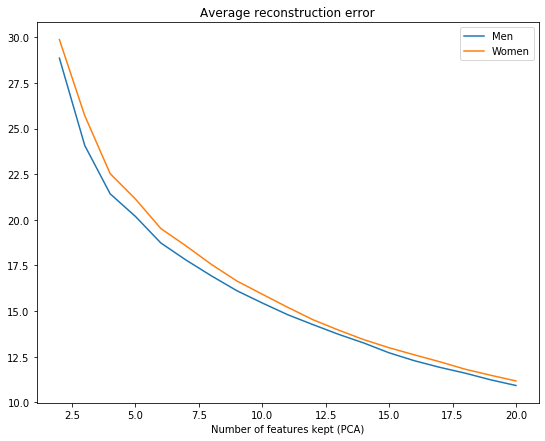

In [47]:
plt.figure(figsize=(9, 7))
plt.plot(dim, re_male, label="Men")
plt.plot(dim, re_female, label="Women")
plt.legend()
plt.title("Average reconstruction error")
plt.xlabel("Number of features kept (PCA)")
plt.show()

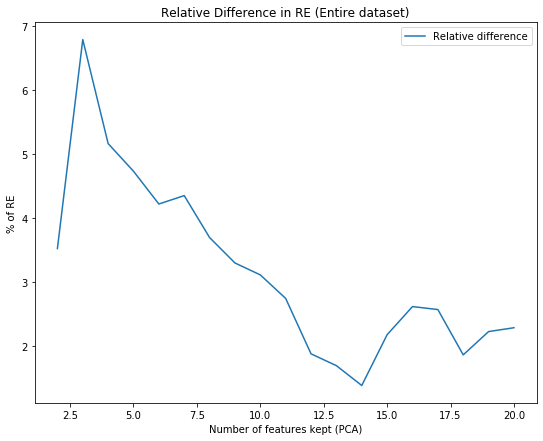

In [48]:
rel_diff = (np.array(re_female)-np.array(re_male))/np.array(re_male)
plt.figure(figsize=(9, 7))
plt.plot(dim, rel_diff*100, label="Relative difference")
plt.legend()
plt.title("Relative Difference in RE (Entire dataset)")
plt.xlabel("Number of features kept (PCA)")
plt.ylabel("% of RE")
plt.show()

In [50]:
U.shape

(1000, 1764)

In [51]:
def fair_loss(X, proj, d):
    pca = PCA(n_components=d)
    pca.fit(X)
    #computing RE for men with dimensionnality reduction d
    opt_proj = pca.inverse_transform(pca.transform(X)) 
    return re(X, proj) - re(X, opt_proj)

In [53]:
fair_loss(A_test, U[:500], 20), fair_loss(B_test, U[500:], 20)

(0.608054601974219, 0.5803916764758288)

On peut résoudre le LP avec scipy... c'est pareil

In [66]:
from scipy.optimize import linprog

In [116]:
Alp = A_lp_const.copy()
Alp = np.concatenate((Alp[0, :, None], Alp[1025, :, None], Alp[1026, :, None]), axis=1).T

In [124]:
blp = b.copy()
blp = np.array([blp[0],
blp[1025],
blp[1026]])

array([ 20.        , -65.06107156, -62.52720432])

In [125]:
bounds = []
for k in range(1024):
    bounds.append((0,1))
bounds.append((-np.inf, np.inf))

In [126]:
coefs = linprog(c, A_ub=Alp, b_ub=blp, A_eq=None, b_eq=None, bounds=bounds)

In [127]:
coefs

     con: array([], dtype=float64)
     fun: -4318.618428839305
 message: 'Optimization terminated successfully.'
     nit: 14
   slack: array([-3.81472496e-05,  3.00161703e+02, -2.23724020e-04])
  status: 0
 success: True
       x: array([ 1.04070850e-09,  2.16428153e-09,  2.95464957e-09, ...,
        1.25671377e-08,  1.99935945e-08, -4.31861843e+03])